###### Introduction to Network Analysis 2023/24 (x)

## Node mixing by (not) degree, graphlet degrees

### IV. Graphlet degree distributions

You are given five networks in Pajek format.

+ Java class dependency network ([java.net](http://lovro.fri.uni-lj.si/ina/nets/java.net))
+ iMDB actors collaboration network ([collaboration_imdb.net](http://lovro.fri.uni-lj.si/ina/nets/collaboration_imdb.net))
+ Gnutella peer-to-peer sharing network ([gnutella.net](http://lovro.fri.uni-lj.si/ina/nets/gnutella.net))
+ Sample of Facebook social network ([facebook.net](http://lovro.fri.uni-lj.si/ina/nets/facebook.net))
+ *nec* overlay map of the Internet ([nec.net](http://lovro.fri.uni-lj.si/ina/nets/nec.net))



1. **(discuss)** Consider the [orca](https://github.com/thocevar/orca) algorithm by Hočevar and Demšar for computing graphlet orbit degrees $k^i$ for graphlets with up to $4$ nodes, $i\in\{0,\dots,14\}$.

	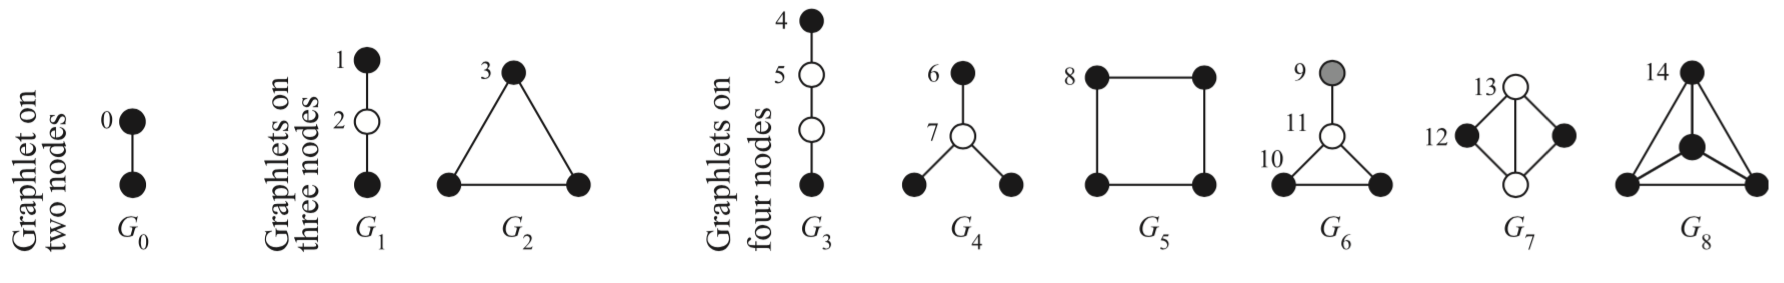



The algorithm uses dependence between orbit counts to save computation time. For 4-node graphlets, they wrote down 10 equations (see *Appendix A* of the [paper](https://academic.oup.com/bioinformatics/article/30/4/559/205331)). Since there are 11 4-graphlets, one count has to be computed by "brute force" - the 4-clique is a good choice, since there are efficient algorithms to count them.

For details, see their paper [*A combinatorial approach to graphlet counting*](https://academic.oup.com/bioinformatics/article/30/4/559/205331).

2. **(homework)** Compute the graphlet orbit degrees $k^i$ and plot the graphlet degree distributions $p_k^i$. How are the graphlet orbit degrees $k^i$ distributed in different networks?

In [ ]:
import utils

nets = [utils.read_pajek(name) for name in ["java", "collaboration_imdb", "gnutella", "facebook", "nec"]]

In [ ]:
import os
import matplotlib.pyplot as plt


def plot(G, orbits):
    fig, axes = plt.subplots(3, 5)
    fig.suptitle(G.name)

    for o in range(15):
        nk = {}
        for i in range(len(G)):
            k = orbits[i][o]
            if k not in nk:
                nk[k] = 0
            nk[k] += 1
        ks = sorted(nk.keys())

        axes[o // 5, o % 5].loglog(ks, [nk[k] / len(G)
                                   for k in ks], 'ok', markersize=1)
        axes[o // 5, o % 5].set_xticks([])
        axes[o // 5, o % 5].set_yticks([])

    plt.savefig(G.name + ".png", bbox_inches='tight')
    plt.close()


def orca(G, exe_folder=".", output_folder="."):
    if "orca" not in os.listdir(exe_folder):
        raise Exception(exe_folder + " doesn't contain orca")

    with open(G.name + ".in", 'w') as file:
        file.write(str(G.number_of_nodes()) + " " +
                   str(G.number_of_edges()) + "\n")

        for i, j in G.edges():
            file.write(str(i) + " " + str(j) + "\n")

    command = f"{os.path.join(exe_folder, 'orca')} node 4 {G.name}.in {output_folder}/{G.name}.orca"
    if (rv := os.system(command)) != 0:
        print(f"WARNING: orca call exited with value {rv}")

    os.remove(G.name + ".in")

    orbits = []
    with open(f"{output_folder}/{G.name}.orca", 'r') as file:
        for line in file:
            orbits.append([int(k) for k in line.split()])

    return orbits


ORCA_EXE_FOLDER = ""

if ORCA_EXE_FOLDER == "":
    raise Exception("please set ORCA_EXE_FOLDER")

for G in nets:
    utils.info(G)
    # NOTE: not tested on Windows
    orbits = orca(G, exe_folder=ORCA_EXE_FOLDER)
    plot(G, orbits)

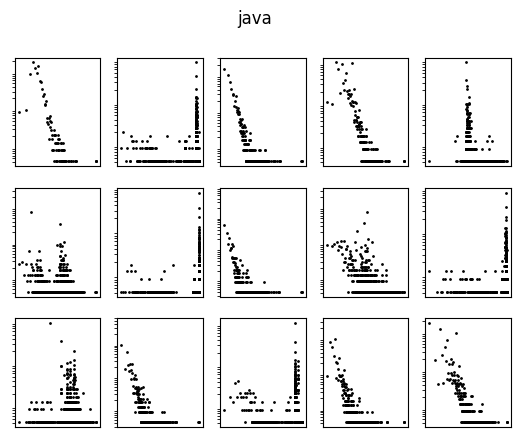
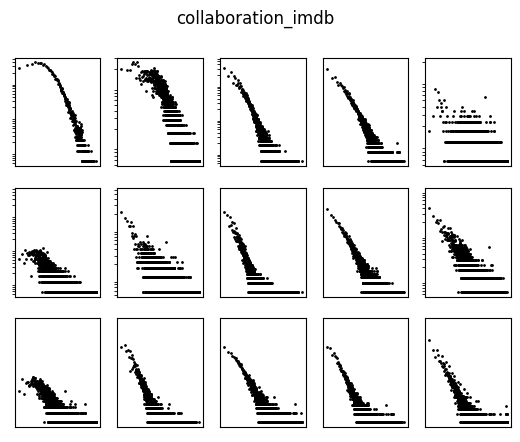
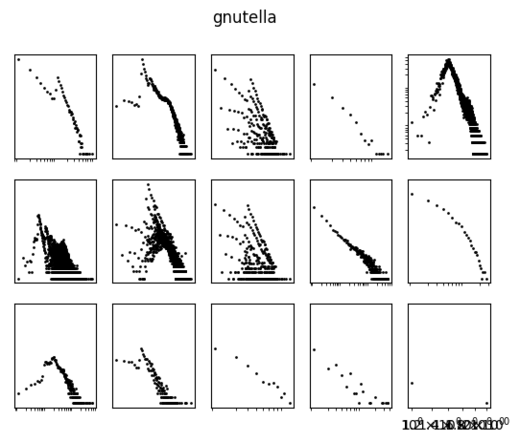
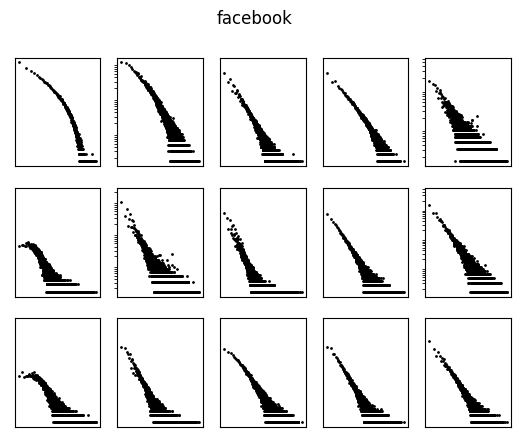
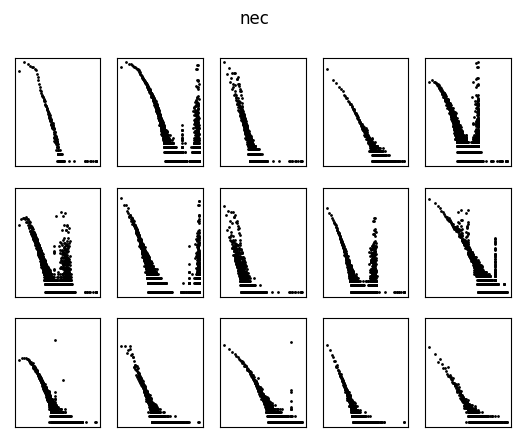

On a few of the P2P `gnutella` network plots, we can see 2 distinct slopes, perhaps corresponding to 2 classes of users (seeders and leechers).

Some of the `nec` plots have an odd cutoff, which may be due to a technological constraint of network devices.